In [1]:
#Importo todas las bibliotecas que necesito

import pandas as pd

import numpy as np

import pylab as plt

import seaborn as sns


#Para que me genere gráficos

%matplotlib inline


#Para que no me muestre los warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Para que me muestre todas las columnas y filas 

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

In [3]:
#Importo el archivo con los datos de tiburones y le llamo sharks

sharks = pd.read_csv('attacks.csv', encoding='latin-1')

#Para que me muestre la cabecera de datos

sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
#Dimensiones de mis datos

sharks.shape

(25723, 24)

In [5]:
#Nombres de las columnas para ver si alguna está mal escrita. 

sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
#Cambio el nombre de las que están mal escritas para que sea más fácil mencionarlas

sharks.rename(columns={'Sex ':'Sex', 'Species ': 'Species'}, inplace=True)

In [7]:
#Para que me muestre de qué tipo son las columnas y cuántos nulos y no nulos tienen

sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [8]:
# Para que me muestre el porcentaje de valores nulos de las columnas

percen_null = sharks.isnull().mean() * 100

percen_null

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

In [9]:
#Localizo a partir de qué fila comienza a haber únicamente filas con valores nulos

null_rows_start = sharks.isnull().all(axis=1).idxmax()

null_rows_start

8702

In [10]:
#Elimino todas las filas que únicamente tengan valores nulos, que no aporten nada


sharks = sharks.drop(sharks.index[8702:])

sharks.shape

(8702, 24)

In [11]:
sharks.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
8697,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Veo que en la columna Case Number hay valores que no son nulos pero son 0 y en el resto de las columnas son 
# nulos, así que cambio los valores 0 a nulo y paso a eliminar columnas volviendo a localizar dónde empiezan 
# las columnas completamente nulas

sharks['Case Number'] = sharks['Case Number'].replace('0', np.nan)

null_rows_start = sharks.isnull().all(axis=1).idxmax()

null_rows_start

6309

In [13]:
sharks = sharks.drop(sharks.index[6309:])

In [14]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6309 entries, 0 to 6308
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

In [15]:
sharks['Species'].unique()

array(['White shark', nan, '2 m shark', ..., "12' tiger shark",
       'Blue pointers',
       'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'],
      dtype=object)

In [16]:
sharks['Species'] = sharks['Species'].replace('Juvenile white shark,  2.7 to 3.2 m', 'unknown')

sharks['Species'] = sharks['Species'].replace('Wobbegong shark', 'Orectolobus maculatus')

sharks['Species'] = sharks['Species'].replace('Possibly a wobbegong', 'Orectolobus maculatus')

sharks['Species'] = sharks['Species'].replace('Invalid incident', 'unknown')

sharks['Species'] = sharks['Species'].replace('Blue pointers', 'Isurus oxyrinchus')

sharks['Species'] = sharks['Species'].replace("12' tiger shark", 'Galeocerdo cuviers')

sharks['Species'] = sharks['Species'].replace('Tiger shark', 'Galeocerdo cuviers')

sharks['Species'] = sharks['Species'].replace('White shark', 'Carcharodon carcharias')

sharks['Species'] = sharks['Species'].fillna('unknown')

sharks['Species'] = sharks['Species'].replace('Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable', 'unknown')

sharks['Species'] = sharks['Species'].replace('2 m shark', 'unknown')

sharks['Species'] = sharks['Species'].replace('Tiger shark, 3m', 'Galeocerdo cuviers')

sharks['Species'] = sharks['Species'].replace( "Bull shark caught, leg recovered & buried beside the man's body", 'Carcharhinus leucas')

In [17]:
sharks['Species'].unique()[:100]

array(['Carcharodon carcharias', 'unknown', 'Galeocerdo cuviers',
       "Lemon shark, 3'", "Bull shark, 6'", 'Grey reef shark',
       'Tawny nurse shark, 2m', 'Shark involvement not confirmed',
       'Questionable', '3 m shark', 'White shark, 3.5 m',
       'White shark, 2.5 m', "6' shark", 'Juvenile bull shark',
       'Bull shark', "Tiger shark, 12'", 'Orectolobus maculatus',
       '3.5 m shark', '1.8 m shark', 'Blacktip shark', 'Bull shark, 2 m',
       'Injury believed caused by an eel, not a shark',
       'Galapagos shark?', '2m shark', 'Bull shark, 3 m ',
       'Grey reef shark. 2 m', 'small shark', 'Wobbegong shark?',
       'Juvenile nurse shark', "Nurse shark. 5'", 'Tiger shark, female',
       'Some drowned but other may have been killed by blue sharks',
       'White shark, 4.6 m', 'Cookiecutter shark', 'Wobbegong shark, 1 m',
       'White shark, 4.5 m', 'Spinner shark, 4 to 5 feet',
       'Tiger shark, 8 to 10 feet', "8' shark",
       'Death may have been due to dr

In [18]:
#El tiburón de puntas blancas WHITETIP: Carcharhinus longimanus

whitetip_lst = []

for i,e in enumerate(sharks['Species']):
    if 'whitetip' in e.lower():
        whitetip_lst.append(i)
        
sharks.loc[whitetip_lst, 'Species'] = 'Carcharhinus longimanus'

In [19]:
#El tiburón blanco o jaquetón: Carcharodon carcharias

white_species = []

for i,e in enumerate(sharks['Species']):
    if 'white' in e:
        white_species.append(e)


white_lst = []

for i,e in enumerate(sharks['Species']):
    if 'white' in e.lower():
        white_lst.append(i)
        
sharks.loc[white_lst, 'Species'] = 'Carcharodon carcharias' 

In [20]:
# Carcharias taurus: tiburón toro, enfermera gris, tiburón de leznas, tiburón tigre de arena
#tiburón damisela, tiburón de dientes serrados o escalandrún

#CON SANDTIGER
sand_species = []

for i,e in enumerate(sharks['Species']):
    if 'sandtiger' in e.lower():
        sand_species.append(e)

sand_species

sand_lst = []

for i,e in enumerate(sharks['Species']):
    if 'sandtiger' in e.lower():
        sand_lst.append(i)
        
sharks.loc[sand_lst, 'Species'] = 'Carcharias taurus'

#CON NURSE
nurse_lst = []

for i,e in enumerate(sharks['Species']):
    if 'nurse' in e.lower():
        nurse_lst.append(i)
        
sharks.loc[nurse_lst, 'Species'] = 'Carcharias taurus'

#CON SAND
sand_lst = []

for i,e in enumerate(sharks['Species']):
    if 'sand' in e.lower():
        sand_lst.append(i)
        
sharks.loc[sand_lst, 'Species'] = 'Carcharias taurus'

#CON BULL
bull_lst = []

for i,e in enumerate(sharks['Species']):
    if 'bull' in e.lower():
        bull_lst.append(i)
        
sharks.loc[bull_lst, 'Species'] = 'Carcharias taurus'

#CON TAURUS
taurus_lst = []

for i,e in enumerate(sharks['Species']):
    if 'taurus' in e.lower():
        taurus_lst.append(i)
        
sharks.loc[taurus_lst, 'Species'] = 'Carcharias taurus'

#Raggedtooth
raggedtooth_lst = []

for i,e in enumerate(sharks['Species']):
    if 'raggedtooth' in e.lower():
        raggedtooth_lst.append(i)
        
sharks.loc[raggedtooth_lst, 'Species'] = 'Carcharias taurus'

In [21]:
#CON Wobbegong: Orectolobus maculatus Tiburón alfombra
wobbegong_lst = []

for i,e in enumerate(sharks['Species']):
    if 'wobbegong' in e.lower():
        wobbegong_lst.append(i)
        
sharks.loc[wobbegong_lst, 'Species'] = 'Orectolobus maculatus'

carpet_lst = []

for i,e in enumerate(sharks['Species']):
    if 'carpet' in e.lower():
        carpet_lst.append(i)
        
sharks.loc[carpet_lst, 'Species'] = 'Orectolobus maculatus'

In [22]:
# Galeocerdo cuviers: TIBURÓN TIGRE

tiger_lst = []

for i,e in enumerate(sharks['Species']):
    if 'tiger' in e.lower():
        tiger_lst.append(i)
        
sharks.loc[tiger_lst, 'Species'] = 'Galeocerdo cuviers'

In [23]:
# Prionace glauca: Tiburón azul

blue_lst = []

for i,e in enumerate(sharks['Species']):
    if 'blue' in e.lower():
        blue_lst.append(i)
        
sharks.loc[blue_lst, 'Species'] = 'Prionace glauca'

In [24]:
# Negaprion brevirostris: Tiburón limon

lemon_lst = []

for i,e in enumerate(sharks['Species']):
    if 'lemon' in e.lower():
        lemon_lst.append(i)
        
sharks.loc[lemon_lst, 'Species'] = 'Negaprion brevirostris'

In [25]:
#Carcharhinus limbatus: Spinner shark, Puntas negras blacktip
spinner_lst = []

for i,e in enumerate(sharks['Species']):
    if 'spinner' in e.lower():
        spinner_lst.append(i)
        
sharks.loc[spinner_lst, 'Species'] = 'Carcharhinus limbatus'

blacktip_lst = []

for i,e in enumerate(sharks['Species']):
    if 'blacktip' in e.lower():
        blacktip_lst.append(i)
        
sharks.loc[blacktip_lst, 'Species'] = 'Carcharhinus limbatus'

black_lst = []

for i,e in enumerate(sharks['Species']):
    if 'black' in e.lower():
        black_lst.append(i)
        
sharks.loc[black_lst, 'Species'] = 'Carcharhinus limbatus'

In [26]:
# Sphyrna mokarran: Tiburón martillo, hammerhead, mako, 

#CON HAMMERHEAD
hammerhead_lst = []

for i,e in enumerate(sharks['Species']):
    if 'hammerhead' in e.lower():
        hammerhead_lst.append(i)
        
sharks.loc[hammerhead_lst, 'Species'] = 'Sphyrna mokarran'

#CON MAKO
mako_lst = []

for i,e in enumerate(sharks['Species']):
    if 'mako' in e.lower():
        mako_lst.append(i)
        
sharks.loc[mako_lst, 'Species'] = 'Sphyrna mokarran'

In [27]:
#Carcharhinus perezi: Tiburón del arrecife del caribe

#CON CARIBBEAN
caribbean_lst = []

for i,e in enumerate(sharks['Species']):
    if 'caribbean' in e.lower():
        caribbean_lst.append(i)
        
sharks.loc[caribbean_lst, 'Species'] = 'Carcharhinus perezi'

In [28]:
#Carcharhinus amblyrhynchos: Tiburón gris

#CON GREY
grey_lst = []

for i,e in enumerate(sharks['Species']):
    if 'grey' in e.lower():
        grey_lst.append(i)
        
sharks.loc[grey_lst, 'Species'] = 'Carcharhinus amblyrhynchos'

#CON GRAY
gray_lst = []

for i,e in enumerate(sharks['Species']):
    if 'gray' in e.lower():
        gray_lst.append(i)
        
sharks.loc[gray_lst, 'Species'] = 'Carcharhinus amblyrhynchos'

In [29]:
#Carcharhinus brachyurus: El tiburón cobrizo o jaquetón cobre

#CON bronze
bronze_lst = []

for i,e in enumerate(sharks['Species']):
    if 'bronze' in e.lower():
        bronze_lst.append(i)
        
sharks.loc[bronze_lst, 'Species'] = 'Carcharhinus brachyurus'

In [30]:
# Lamna nasus: Porbeagle
#con porbeagle

porbeagle_lst = []

for i,e in enumerate(sharks['Species']):
    if 'porbeagle' in e.lower():
        porbeagle_lst.append(i)
        
sharks.loc[porbeagle_lst, 'Species'] = 'Lamna nasus'

In [31]:
# Carcharhinus galapagensis: Galapagos Tiburón de los Galápagos
#con galapagos

galapagos_lst = []

for i,e in enumerate(sharks['Species']):
    if 'galapagos' in e.lower():
        galapagos_lst.append(i)
        
sharks.loc[galapagos_lst, 'Species'] = 'Carcharhinus galapagensis'

In [32]:
# Lamna ditropis: Tiburón salmón

#con salmon

salmon_lst = []

for i,e in enumerate(sharks['Species']):
    if 'salmon' in e.lower():
        salmon_lst.append(i)
        
sharks.loc[salmon_lst, 'Species'] = 'Lamna ditropis'

In [33]:
#Squalus acanthias: Dogfish La mielga, galludo o tollo de cacho 

dogfish_lst = []

for i,e in enumerate(sharks['Species']):
    if 'dogfish' in e.lower():
        dogfish_lst.append(i)
        
sharks.loc[dogfish_lst, 'Species'] = 'Squalus acanthias'

In [34]:
#Notorynchus cepedianus: broadnose Tiburón vaca de hocico corto, gatopardo o tiburón moteado

broadnose_lst = []

for i,e in enumerate(sharks['Species']):
    if 'broadnose' in e.lower():
        broadnose_lst.append(i)
        
sharks.loc[broadnose_lst, 'Species'] = 'Notorynchus cepedianus'

sevengill_lst = []

for i,e in enumerate(sharks['Species']):
    if 'sevengill' in e.lower():
        sevengill_lst.append(i)
        
sharks.loc[sevengill_lst, 'Species'] = 'Notorynchus cepedianus'

In [35]:
#Carcharhinus obscurus: Dusky

dusky_lst = []

for i,e in enumerate(sharks['Species']):
    if 'dusky' in e.lower():
        dusky_lst.append(i)
        
sharks.loc[dusky_lst, 'Species'] = 'Carcharhinus obscurus'

In [36]:
#Carcharhinus leucas: Zambesi, zambezi

zambesi_lst = []

for i,e in enumerate(sharks['Species']):
    if 'zambesi' in e.lower():
        zambesi_lst.append(i)
        
sharks.loc[zambesi_lst, 'Species'] = 'Carcharhinus obscurus'

zambezi_lst = []

for i,e in enumerate(sharks['Species']):
    if 'zambezi' in e.lower():
        zambezi_lst.append(i)
        
sharks.loc[zambezi_lst, 'Species'] = 'Carcharhinus obscurus'

leucas_lst = []

for i,e in enumerate(sharks['Species']):
    if 'leucas' in e.lower():
        leucas_lst.append(i)
        
sharks.loc[leucas_lst, 'Species'] = 'Carcharhinus obscurus'

In [37]:
#Rhincodon typus: whale shark
#whale

whale_lst = []

for i,e in enumerate(sharks['Species']):
    if 'whale' in e.lower():
        whale_lst.append(i)
        
sharks.loc[whale_lst, 'Species'] = 'Rhincodon typus'

In [38]:
#Heterodontus portusjacksoni

#El tiburón de Port Jackson

jackson_lst = []

for i,e in enumerate(sharks['Species']):
    if 'jackson' in e.lower():
        jackson_lst.append(i)
        
sharks.loc[jackson_lst, 'Species'] = 'Heterodontus portusjacksoni'

In [39]:
fish_lst = []
for i, e in enumerate(sharks['Species']):
    if any(keyword.lower() in e.lower() for keyword in ['unidentified', 'shark', 'fish', 'bite', 'incident', 'attack', 'drowning', '4', '1', 'invalid', 'questionable', '\xa0', 'fayrer', 'identified', 'spurdog', '5', 'Not', 'Tooth', 'Unknown', 'maculpinnis']):
        fish_lst.append(i)
        
sharks.loc[fish_lst, 'Species'] = 'unknown'

In [40]:
sharks['Species'].unique()

array(['Carcharodon carcharias', 'unknown', 'Galeocerdo cuviers',
       'Negaprion brevirostris', 'Carcharias taurus',
       'Carcharhinus amblyrhynchos', 'Orectolobus maculatus',
       'Carcharhinus limbatus', 'Carcharhinus galapagensis',
       'Prionace glauca', 'Lamna nasus', 'Carcharhinus longimanus',
       'Carcharhinus perezi', 'Squalus acanthias', 'Sphyrna mokarran',
       'Carcharhinus brachyurus', 'Lamna ditropis',
       'Heterodontus portusjacksoni', 'Carcharhinus obscurus', ' ',
       'Rhincodon typus', 'Isurus oxyrinchus'], dtype=object)

In [41]:
len(sharks['Species'].unique())

22

In [42]:
#Date

# Hasta esa fila el Case Number.1 indica la fecha
sharks.loc[0:6177, 'Date'] = sharks.loc[0:6177, 'Case Number.1']

# Ahora se quitan los caracteres posteriores a la fecha
sharks['Date'] = sharks['Date'].str.extract('^(\d{4}\.\d{2}\.\d{2})', expand=False)

# Se corrigen los errores
nuevos_valores = {117: '2017.07.20',
                 3522: '1967.07.05',
                 3880: '1961.09.06'}
sharks['Date'].replace(nuevos_valores, inplace=True)

# El resto de valores no son exactos, con lo que se indican como unknown
sharks.loc[6177:, 'Date'] = 'unknown'


In [43]:
# Year

# Se elimina el .0 que viene al final de muchos años

sharks['Year'] = sharks['Year'].astype(str).replace(to_replace=r'\.0', value='', regex=True)

# Se cambian los 0 por unknown

sharks.Year.replace({'0': 'unknown'}, inplace=True)

In [44]:
# Type: Los nulos e invalid se cambian por unknown

sharks['Type'].fillna('unknown', inplace=True)

sharks['Type'] = sharks['Type'].replace(to_replace='Invalid', value='unknown', regex=True)

# Se unifican todos los boating

sharks['Type'] = sharks['Type'].replace(to_replace='Boat', value='Boating')

sharks['Type'] = sharks['Type'].replace(to_replace='Boatomg', value='Boating')

In [45]:
# Country

sharks['Country'] = sharks['Country'].str.capitalize()

# Se cambian las string que se consideran mal puestas

sharks['Country'].replace({'St helena, british overseas territory': 'British overseas territory',
                       'Diego garcia': 'unknown', 
                       'Turks & caicos': 'Turkish islands and caicos',
                       'United arab emirates (uae)': 'United arab emirates',
                       'British virgin islands': 'British overseas territory',
                       'Grand cayman': 'Caiman Islands',
                       'Mexico ': 'Mexico',
                       ' tonga': 'Tonga',
                       'Egypt / israel': 'Egypt',
                       'British isles': 'British overseas territory',
                       'Federated states of micronesia': 'Micronesia',
                       'Admiralty islands': 'Papua New Guinea',
                       'Red sea / indian ocean': 'Read sea',
                       'Andaman / nicobar islandas': 'Andaman and nicobar islands',
                       'Sudan?': 'Sudan',
                       'Iran / iraq': 'Iran',
                       ' philippines': 'Philippines',
                       'Solomon islands / vanuatu': 'Solomon islands',
                       'Southwest pacific ocean': 'South pacific ocean',
                       'Mid-pacifc ocean': 'Mid pacifc ocean',
                       'Italy / croatia': 'Italy',
                       'San domingo': 'Dominican republic',
                       'Crete': 'Greece',
                       'Egypt ': 'Egypt',
                       'British new guinea': 'Territory of Papua',
                       'Ocean': 'unknown',
                       'Indian ocean?': 'Indian ocean',
                       'Andaman islands': 'Andaman and nicobar islands',
                       'Equatorial guinea / cameroon': 'Equatorial guinea',
                       'Africa': 'unknown',                    
                       'Coast of africa': 'unknown',
                       'Between portugal & india': 'unknown',
                       'Red sea?': 'Read sea',
                       'Asia?': 'unknown',
                       'Ceylon (sri lanka)': 'Ceylon'
                      }, inplace=True)

# Se cambian los nulos por unknown

sharks['Country'].fillna('unknown', inplace=True)

In [46]:
len(sharks['Country'].unique())

184

In [47]:
# Area

sharks['Area'] = sharks['Area'].str.capitalize()

# Se cambian nulos por unknown. No se verifican los valores uno por uno por la gran cantidad de valores únicos

sharks['Area'].fillna('unknown', inplace=True)

In [48]:
sharks.query("Country == 'unknown' & Area != 'unknown'")   

# Se comprueba si se puede deducir algun país por su area

# Se cambian aquellos valores que se pueden deducir

nuevos_valores = {2956: 'English channel',
                  3387: 'Caribbean sea',
                  4018: 'Australia',
                  4231: 'Andaman and nicobar islands',
                  4266: 'Madagascar',
                  4498: 'Caribbean sea',
                  4712: 'Caribbean sea',
                  5020: 'Indian ocean',
                  5612: 'Mediterranean sea',
                  5742: 'Mexico',
                  5748: 'Northern pacific ocean',
                  6059: 'Caribbean sea',
                  6137: 'Middle atlantic ocean',
                  6175: 'Ionian sea',
                  6177: 'Ionian sea',              
                 }
sharks['Country'].update(pd.Series(nuevos_valores))

In [49]:
# Location

sharks['Location'] = sharks['Location'].str.capitalize()

# Se cambian nulos por unknown. No se verifican los valores uno por uno por la gran cantidad de valores únicos

sharks['Location'].fillna('unknown', inplace=True)

In [50]:
# Se comprueba si se puede deducir algun país o area por su localización

sharks.query("Country == 'unknown' & Location != 'unknown'")   

# Se cambian aquellos valores que se pueden deducir

nuevos_valores_area = {3605: 'Florida strait',
                  4639: 'South china sea',
                  6155: 'Carlisle bay',         
                 }
sharks['Area'].update(pd.Series(nuevos_valores_area))

nuevos_valores_pais = {3605: 'Cuba',
                  4639: 'South china sea',
                  6155: 'Antigua',      
                 }              
sharks['Country'].update(pd.Series(nuevos_valores_pais))

In [51]:
# Activity

# Se cambian nulos por unknown. No se verifican los valores uno por uno por la gran cantidad de valores únicos

sharks['Activity'].fillna('Activity', inplace=True)

In [52]:
# Name

# Se cambian nulos, male y female por unknown. No se verifican los valores uno por uno por la gran cantidad de valores únicos

sharks['Name'].fillna('unknown', inplace=True)

sharks['Name'].replace({'male': 'unknown',
                  'Male': 'unknown',
                  'female': 'unknown',
                  'Female': 'unknown',
                  'Unknown': 'unknown'
                 } , inplace=True)

In [53]:
# Sex

sharks.Sex.unique()   # ['F', 'M', nan, 'M ', 'lli', 'N', '.']

# Se corrige 'M ' y el resto (excepto F y M) se cambian por unknown

sharks.Sex.fillna('unknown', inplace=True)

sharks.Sex.replace({'M ': 'M',
                'lli': 'unknown', 
                'N': 'unknown',
                '.': 'unknown'
                }, inplace=True)

In [54]:
# Se comprueba si se puede deducir el sexo de los unknown por el nombre

sharks.query("Sex == 'unknown' & Name != 'unknown'")

# Se cambian aquellos valores que se pueden deducir

nuevos_valores_area = {218: 'M',
                  243: 'M',
                  463: 'M', 
                  465: 'M',
                  747: 'M',
                  820: 'M', 
                  839: 'M',
                  1177: 'M',
                  1366: 'M', 
                  1525: 'F',
                  1624: 'M',
                  2225: 'M', 
                  2246: 'M',
                  2273: 'M',
                  2279: 'M', 
                  2295: 'M',
                  2317: 'M',
                  2452: 'F', 
                  2472: 'M',
                  2478: 'M',
                  2502: 'M', 
                  2505: 'M',
                  2799: 'M',
                  2865: 'M', 
                  3049: 'M',
                  3157: 'M',
                  3162: 'M', 
                  3235: 'M',
                  3306: 'M',
                  3452: 'M', 
                  3487: 'M',
                  3704: 'M',
                  3768: 'M', 
                  3855: 'M',
                  4036: 'F',
                  4338: 'M', 
                  4403: 'M',
                  4467: 'M',
                  4839: 'M', 
                  5499: 'M',
                  5602: 'M',
                  6108: 'M', 
                  6131: 'M',
                 }
sharks['Sex'].update(pd.Series(nuevos_valores_area))

In [55]:
# Age
#Extrae dos dígitos

def age_filt(x):
    x=str(x)
    age_pattern = r"\b(\d{2})\b"  
    match = re.search(age_pattern, x)
    
    if match:
        age = int(match.group(1))
        return int(age)
    else:
        return np.nan

In [56]:
# Injury: Se cambian los valores nulos por unknown

sharks.Injury.fillna('unknown', inplace=True)

In [57]:
# Fatal: Se cambian los valores nulos por unknown y se corrigen los valores mal puestos

sharks['Fatal (Y/N)'].fillna('unknown', inplace=True)

sharks['Fatal (Y/N)'].replace({'M': 'unknown',
                       'UNKNOWN': 'unknown', 
                       '2017': 'unknown',
                       ' N': 'N',
                       'N ': 'N',
                       'y': 'Y'
                      }, inplace=True)

In [58]:
# Time: Se cambian los valores nulos por unknown y se corrigen el resto de valores

sharks['Time'].fillna('unknown', inplace=True)

# Se convierten los valores con formato 15h00 a formato 15:00

condicion = sharks['Time'].str.contains('^\d+h\d+$')

sharks.loc[condicion, 'Time'] = sharks.loc[condicion, 'Time'].str.replace(r'(^\d+)h(\d+)', r'\1:\2')

# Arreglo del resto de valores

sharks['Time'].replace({'14h00  -15h00': '14:30',
                       'Late afternoon': 'unknown', 
                       'Morning': 'unknown',
                       'Afternoon': 'unknown',
                       '19h00, Dusk': '19:00',
                       'Night': 'unknown',
                       'Midday ': 'unknown',
                       'Shortly before 12h00': '12:00',
                       'After noon': 'unknown',
                       '1300': '13:00', 
                       '14h30 / 15h30': '15:00',
                       'Morning ': 'unknown',
                       'Midnight': 'unknown',
                       '09h30 / 10h00': '09:45',
                       '10h45-11h15': '11:00',
                       'Evening': 'unknown',
                       'Sometime between 06h00 & 08hoo': '07:00',
                       'Early afternoon': 'unknown',
                       '07h00 - 08h00': '07:30',
                       '18h15-18h30': '18:23',
                       '09h00 - 09h30': '09:15',
                       '0830': '08:30', 
                       'Just before noon': 'unknown',
                       'Early morning': 'unknown',
                       'Dawn': 'unknown',
                       'AM': 'unknown',
                       'A.M.': 'unknown',
                       'Dusk': 'unknown',
                       'Lunchtime': 'unknown', 
                       '15j45': '15:45',
                       '0500': '05:00',
                       'Before 07h00': 'unknown',
                       '10h00 -- 11h00': '10:30',
                       '"Just before 11h00"': '11:00', 
                       'Sunset': 'unknown',
                       '  ': 'unknown',
                       '"Evening"': 'unknown',
                       'Just before sundown': 'unknown',
                       '11h30 ': '11:30',
                       'Between 05h00 and 08h00': 'unknown',   # se deja como unknown por la gran amplitud del intervalo
                       '17h00 or 17h40': '17:20',
                       '>08h00': '08:00',
                       '--': 'unknown',
                       'Just after 12h00': '12:00',
                       ' ': 'unknown',
                       'Early Morning': 'unknown', 
                       'Shortly after midnight': 'unknown',
                       '\xa0 ': 'unknown',
                       '09h00 -10h00': '09:30',
                       '20h45 (Sunset)': '20:45',
                       'Late morning': 'unknown', 
                       'P.M.': 'unknown',
                       'Shortly before 13h00': '13:00',
                       '8:04 pm': '20:04',
                       'Possibly same incident as 2000.08.21': 'unknown',
                       'After Dusk': 'unknown',
                       'Noon': 'unknown',
                       '2 hours after Opperman': 'unknown',
                       'Mid afternoon': 'unknown',
                       'Mid morning': 'unknown',
                       '11h00 / 11h30': '11:15',
                       '"Night"': 'unknown', 
                       '18h30?': '18:30',
                       '30 minutes after 1992.07.08.a': 'unknown',
                       '>06h45': '06:45',
                       'Between 06h00 & 07h20': '06:40',
                       '<07h30': '07:30', 
                       '17h00 Sunset': '17:00',
                       'Nightfall': 'unknown',
                       'X': 'unknown',
                       '18h30 (Sunset)': '18:30',
                       '06j00': '06:00',
                       'Prior to 10h37': '10:37', 
                       'Daybreak': 'unknown',
                       '>12h00': '12:00',
                       'Mid-morning': 'unknown',
                       '16h30 or 18h00': '17:15',
                       'Just before dawn': 'unknown', 
                       ' 14h00': '14:00',
                       'Daytime': 'unknown',
                       'Dark': 'unknown',
                       '10h00 / 11h00': '10:30',
                       '"After lunch"': 'unknown',
                       '15h00 or 15h45': '15:23',
                       '>17h00': '17:00',
                       '19h00 / 20h00': '19:30',
                       '12h45 / 13h45': '13:15',
                       '14h00 - 15h00': '14:30',
                       'night': 'unknown', 
                       '03h45 - 04h00': '03:53',
                       '09h30 / 15h30': 'unknown',
                       '08h00 / 09h30': '08:45',
                       '12h00 to 14h00': '13:00',
                       'Late night': 'unknown', 
                       '10h30 or 13h30': 'unknown',
                       '15h00j': '15:00',
                       'Midday.': 'unknown',
                       '"After dark"': 'unknown',
                       '10h00 or 14h00': 'unknown',
                       '2 hrs before sunset': 'unknown',
                       '18h15 to 21h30': 'unknown',
                       '1500': '15:00', 
                       '"shortly before dusk"': 'unknown',
                       '>17h30': '17:30',
                       '>14h30': '14:30',
                       'Between 11h00 & 12h00': '11:30',
                       'After 04h00': '04:00',
                       '11h01 -time of ship sinking': '11:01',
                       'Ship aban-doned at 03h10': '03:10',
                       'After dusk': 'unknown',
                       'FATAL  (Wire netting installed at local beaches after this incident.)': 'unknown',
                       'After midnight': 'unknown',
                       'Late afternon': 'unknown', 
                       '"Early evening"': 'unknown',
                       'Late Afternoon': 'unknown',
                       '   ': 'unknown',
                       'Before daybreak': 'unknown',
                       'dusk': 'unknown', 
                       'Before 10h30': '10:30',
                       '06h00 -- 07h00': '06:30',
                       '17h00-18h00': '17:30',
                       '19h00-20h00': '19:30',
                       'Midday': 'unknown',
                       '09h30 ': '09:30',
                       '13:345': '13:45',
                       '11:115': '11:15',
                       '1600': '16:00',
                       '9:00': '09:00',
                       'unknwon': 'unknown'
                      }, inplace=True)

In [59]:
# Investigator or Source

# Se cambian nulos por unknown. No se verifican los valores uno por uno por la gran cantidad de valores únicos

sharks['Investigator or Source'].fillna('unknown', inplace=True)

In [60]:
# href formula

sharks['href formula'].fillna('unknown', inplace=True) # Se pone el único valor nulo como unknown

sharks['href formula'].loc[sharks['href formula'] == 'unknown']   # Se busca su índice

sharks['href formula'][3244] = sharks['href'][3244]    # Se iguala el valor al valor de la columna href

In [61]:
# Case Number.1 y Case Number.2: Se igualan a Case Number

sharks['Case Number.1'] = sharks['Case Number']

sharks['Case Number.2'] = sharks['Case Number']

In [62]:
# Unnamed: 22 y # Unnamed: 23: Se convierten todos los valores en unknown puesto que no se sabe representan 

sharks.loc[:,"Unnamed: 22"] = "unknown"

sharks.loc[:,"Unnamed: 23"] = "unknown"

In [63]:
# Se resetea el índice por las filas eliminadas antes de limpiar las columnas

sharks.reset_index(inplace=True, drop=True)


<Figure size 1000x600 with 0 Axes>

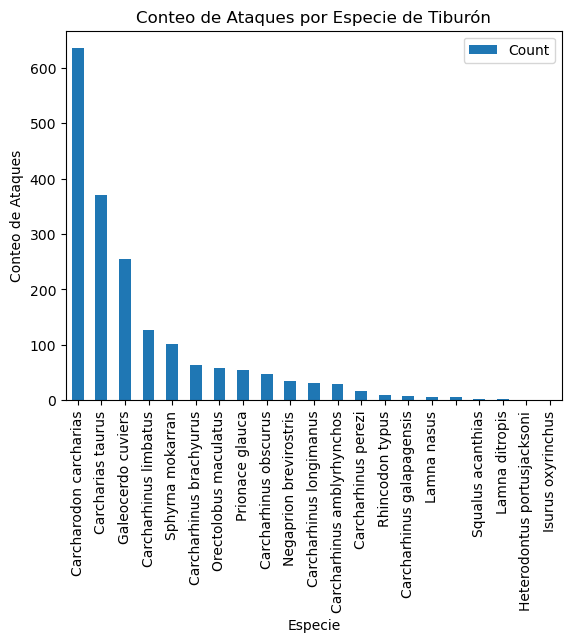

In [70]:

import matplotlib.pyplot as plt

# Obtener el conteo de ataques por especie
count_by_species = sharks['Species'].value_counts()

# Convertir el resultado en un DataFrame
count_df = pd.DataFrame(count_by_species)

# Configurar el nombre de la columna del conteo
count_df.columns = ['Count']

# Eliminar la fila correspondiente a 'unknown'
count_df = count_df.drop('unknown', axis=0)

# Ordenar el DataFrame por el conteo en orden descendente
count_df = count_df.sort_values(by='Count', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
count_df.plot(kind='bar')
plt.title('Conteo de Ataques por Especie de Tiburón')
plt.xlabel('Especie')
plt.ylabel('Conteo de Ataques')

# Guardar el gráfico como imagen
plt.savefig('count_by_species.png', bbox_inches='tight')

In [72]:
# Obtener el conteo de ataques por especie
count_by_species = sharks['Species'].value_counts()
count_by_species

unknown                        4449
Carcharodon carcharias          635
Carcharias taurus               370
Galeocerdo cuviers              255
Carcharhinus limbatus           127
Sphyrna mokarran                102
Carcharhinus brachyurus          64
Orectolobus maculatus            58
Prionace glauca                  55
Carcharhinus obscurus            48
Negaprion brevirostris           34
Carcharhinus longimanus          31
Carcharhinus amblyrhynchos       29
Carcharhinus perezi              16
Rhincodon typus                   9
Carcharhinus galapagensis         7
Lamna nasus                       6
                                  6
Squalus acanthias                 3
Lamna ditropis                    3
Heterodontus portusjacksoni       1
Isurus oxyrinchus                 1
Name: Species, dtype: int64